In [91]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# !pip install minisom
from minisom import MiniSom

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import plotly.express as px

%matplotlib inline

In [42]:
def som_pie_grid(som, data, labels):
  """Helper to create piechart grid viz
  
  Example: https://raw.githubusercontent.com/JustGlowing/minisom/master/examples/resulting_images/som_iris_pies.png

  :param som: fitted MiniSom instance
  :param data: the data the MiniSom was fit to
  :param labels: an array of labels to use for coloring visual
  """
  labels_map = som.labels_map(data, labels)
  label_names = np.unique(labels)

  plt.figure(figsize=(70, 70))
  the_grid = GridSpec(70, 70)
  for position in labels_map.keys():
      label_fracs = [labels_map[position][lab] for lab in label_names]
      plt.subplot(the_grid[position[1] - 12, position[0]], aspect=1)
      patches, texts = plt.pie(label_fracs)

  plt.show()

  # Cheating way to align legend, create a separate figure just 
  # for legend.  Will have superfluous whitespace below
  plt.legend(patches, label_names, loc='upper left', ncol=5)
  plt.axis('off')
  plt.show()

* Read in the data from `data_url`
* Drop all NAs
* Filter based on the `'Pos'` column to where only have the positions `['C', 'PG', 'SG']` remain
* Drop all non-numeric columns
* Scale the data

In [43]:
data_url = "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/nba_player_seasons.csv"
data = pd.read_csv(data_url)

In [44]:
# drop nulls
data.dropna(inplace=True)

In [45]:
# filter based on 'Pos' values
data = data.loc[data['Pos'].isin(['C', 'PG', 'SG'])]

In [47]:
# Drop non-numeric columns
y = data['Pos']
X = data.select_dtypes(exclude='O')

In [48]:
# Scale the data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

* Fit a `MiniSom` instance to the scaled data
  * Choose your own grid size
  * Set a `random_seed` to have reproducible results
  * Initialize the `MiniSom` weight vectors using `.pca_weights_init()` or `.random_weights_init()`
  * Train the model using `.train_random()` or `.train_batch()`

In [51]:
n_cols=X_sc.shape[1]

In [73]:
grid_cols = 12
grid_rows = 8

som = MiniSom(grid_cols, grid_rows, n_cols, random_seed=37)
som.pca_weights_init(X_sc)
som.train_batch(X_sc, num_iteration=200)

* Use the helper function defined at the top of the notebook to plot the SOM's fit
  * Use the players' positions (the `'Pos'` column) as the labels in the viz
  * Experiment with the SOM's grid size, initialization method, and training method.  Decide a 'good' fit using this visual as guidance.

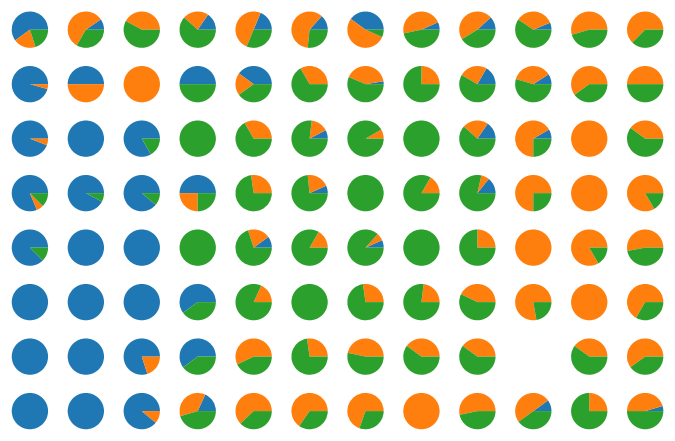

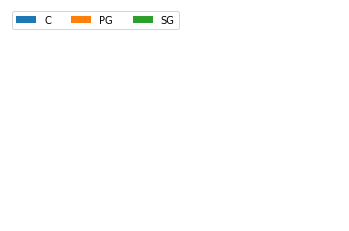

In [74]:
som_pie_grid(som, X_sc, y)

* Perform dimension reduction (to 2d) with another method (perhaps `PCA` or `TSNE`).
* Create a scatter plot of the results of this dimension reduction and color the scatter plot by the players' positions (the `'Pos'` column).
  * How do these results compare to that of the SOM? What are the pros and cons of the different approaches you took in this notebook?

In [88]:
tsne = TSNE(n_components=2)
tsne_comps = tsne.fit_transform(X_sc)

In [92]:
 fig = px.scatter(x=tsne_comps[:,0], y=tsne_comps[:,1], color=y)
 fig.show()

The results of the two methods seem to be similar. Each has one cluster that separates nicely while the other two are mixed together. 